In [1]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, cosmology, healpy as hp, local
import pysm3
import pysm3.units as u
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")
ac2rad  = np.pi/10800.
deg2rad = np.pi/180.

In [7]:
def foreground(nu,L,name=None,beta_d=1.5,beta_s=-3.1):
    L80 = L/80.
    if name in ['LiteBIRD','Planck','PICO']:
        dust, sync = 2e2, 25.
    if name in ['B3Keck','BA']:
        dust, sync = 1., 1.
    if name in ['AdvACT','ACTPol']: 
        dust, sync = 10., 10.
    if name is None:
        dust, sync = 1., 1.
    dBB = dust*(4.7/CMB.Tcmb**2)*L80**(-0.58) * (CMB.Int_dust(nu,beta=beta_d)/CMB.Int_dust(353.,beta=beta_d))**2 * (2*np.pi/L/(L+1.)) 
    sBB = sync*(1.5/CMB.Tcmb**2)*L80**(-0.8) * (nu/23)**(2*beta_s) * (2*np.pi/L/(L+1.))
    fBB = dBB + sBB
    fEE = 2*dBB + 4*sBB
    return fEE, fBB

In [3]:
Lmax  = 3000       # maximum multipole of output normalization
rlmin, rlmax = 50, Lmax  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = L*(L+1)/2/np.pi

In [4]:
dnu = 150
snu = 100

In [14]:
dee, dbb = foreground(dnu,L)
see, sbb = foreground(snu,L)

In [15]:
ucl = CMB.read_camb_cls('data/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:Lmax+1]
lcl = CMB.read_camb_cls('data/cosmo2017_10K_acc3_lensedCls.dat',ftype='lens',output='array')[:,:Lmax+1]

In [16]:
nside = 512
lmax = 2*nside

In [17]:
dsky = pysm3.Sky(nside=nside, preset_strings=["d1"])
ssky = pysm3.Sky(nside=nside, preset_strings=["s1"])

In [18]:
dsky.components
ssky.components

In [19]:
dmap = dsky.get_emission(dnu * u.GHz)
smap = ssky.get_emission(snu * u.GHz)

In [20]:
dmap = dmap.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(dnu*u.GHz))
smap = smap.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(snu*u.GHz))

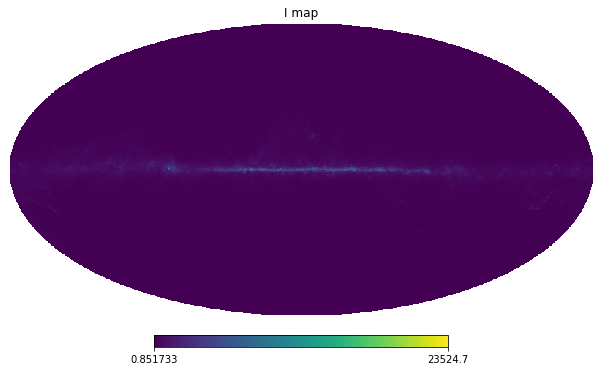

In [21]:
hp.mollview(dmap[0], title="I map")

In [22]:
dQ = dmap[1]/CMB.Tcmb
dU = dmap[2]/CMB.Tcmb
dElm, dBlm = cs.utils.hp_map2alm_spin(nside,lmax,lmax,2,dQ,dU)
dEE = cs.utils.alm2cl(lmax,dElm)
dBB = cs.utils.alm2cl(lmax,dBlm)
dEB = cs.utils.alm2cl(lmax,dElm,dBlm)

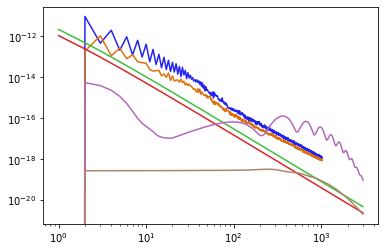

In [26]:
xscale('log')
yscale('log')
plot(dEE)
plot(dBB)
plot(dee*1e1)
plot(dbb*1e1)
plot(lcl[1])
plot(lcl[2])

In [24]:
sQ = smap[1]/CMB.Tcmb
sU = smap[2]/CMB.Tcmb
sElm, sBlm = cs.utils.hp_map2alm_spin(nside,lmax,lmax,2,sQ,sU)
sEE = cs.utils.alm2cl(lmax,sElm)
sBB = cs.utils.alm2cl(lmax,sBlm)
sEB = cs.utils.alm2cl(lmax,sElm,sBlm)

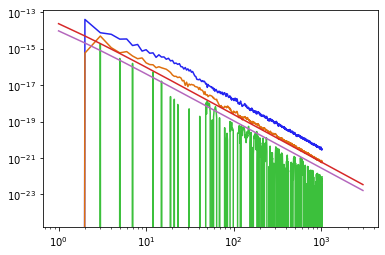

In [25]:
xscale('log')
yscale('log')
plot(sEE)
plot(sBB)
plot(sEB)
plot(see)
plot(sbb)